# Thư viện và File

## Pip

In [ ]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn        as sns
import warnings   
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.patches as mpatches
from kmodes.kprototypes import KPrototypes
%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD
from scipy.stats import f_oneway

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import string
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
import webcolors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from fuzzywuzzy import fuzz
from sklearn.cluster import KMeans

/usr/local/lib/python3.8/dist-packages/gensim/corpora/dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping, defaultdict
/usr/local/lib/python3.8/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Đọc File

In [ ]:
df = pd.read_csv('/content/Online Retail.csv') #Đọc file 
df.head(3)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,1/12/2010,8:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,1/12/2010,8:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,1/12/2010,8:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom


# EDA

In [ ]:
#mô  tả
print("Các cột hiện có của bộ dữ liệu:",'\n')
for x in df.columns:
    print(x)
print('\n')
print('Số dòng của bộ dữ liệu :',len(df))

Các cột hiện có của bộ dữ liệu: 

InvoiceNo
InvoiceDate
InvoiceTime
StockCode
Description
Quantity
UnitPrice
Totalsale
CustomerID
Country


Số dòng của bộ dữ liệu : 465223


Giải thích các thuộc tính:



1.   InvoiceNo: Mã đơn hàng.
2. InvoiceDate: Ngày đặt hàng.
3. InvoiceTime: Thời gian đặt hàng (Phụ thuộc vào vị trí địa lí của  từng khách hàng).
4. StockCode: Mã sản phẩm.
5. Description: Mô tả sản phẩm (Bao gồm các sản phẩm bị lỗi, hư hỏng, bị trả về, thất lạc).
6. Quantity: Số lượng sản phẩm bán.
7. UnitPrice: Giá bán mỗi đơn vị sản phẩm.
8. Totalsale: Doanh thu bán hàng.
9. CustomerID: Mã khách hàng.
10. Country: Quốc gia bán hàng.
11.  List item



In [ ]:
#Đếm số dòng bị thiếu
df1 = df[df.CustomerID.isnull()]
print("Các dòng chứa giá trị bị thiếu\n",df1) #IN RA DÒNG BỊ THIẾU
print('Số giá trị bị thiếu của cột CustomerID:', len(df1))

Các dòng chứa giá trị bị thiếu
        InvoiceNo InvoiceDate  InvoiceTime StockCode  \
622       536414   1/12/2010  11:52:00 AM     22139   
1443      536544   1/12/2010   2:32:00 PM     21773   
1444      536544   1/12/2010   2:32:00 PM     21774   
1445      536544   1/12/2010   2:32:00 PM     21786   
1446      536544   1/12/2010   2:32:00 PM     21787   
...          ...         ...          ...       ...   
464522    576110  14-11-2011  10:33:00 AM     35965   
464813    576185  14-11-2011  11:25:00 AM     22575   
464971    576192  14-11-2011  11:57:00 AM     22827   
464972    576193  14-11-2011  11:57:00 AM     22827   
465222    576214  14-11-2011  12:49:00 PM     23531   

                            Description  Quantity  UnitPrice  Totalsale  \
622                                 NaN        56       0.00       0.00   
1443    DECORATIVE ROSE BATHROOM BOTTLE         1       2.51       2.51   
1444    DECORATIVE CATS BATHROOM BOTTLE         2       2.51       5.02   
1445   

In [ ]:
# Số đơn hàng của từng nước
print(df.CustomerID.nunique())
print('\n')
print(df.Country.value_counts())

4165


United Kingdom          424008
Germany                   8359
France                    7378
EIRE                      7215
Spain                     2310
Netherlands               2194
Switzerland               1920
Belgium                   1847
Portugal                  1304
Australia                 1224
Norway                     861
Channel Islands            741
Finland                    635
Italy                      608
Cyprus                     518
Sweden                     444
Unspecified                393
Austria                    361
Poland                     338
Japan                      318
Israel                     297
Denmark                    295
Hong Kong                  286
USA                        248
Singapore                  229
Iceland                    171
Canada                     151
Greece                     110
Malta                      104
United Arab Emirates        68
European Community          61
RSA                         58
L

## Tương quan giữa các biến

In [ ]:
i = 1
plt.figure(figsize=(19, 16))
for c in df.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(x=df[c], y=df['Quantity'])
    i+=1

In [ ]:
corr = df.corr()
fig = plt.figure(figsize = ([10,10]))
plt.title('Tương quan các biến')
sns.heatmap(corr, annot= True)
plt.show()

##Kiểm tra outliers

In [ ]:
# Tìm ouliners
plt.boxplot(df['Totalsale'])
plt.show()

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=65,size=10)
plot = plt.scatter(df['Quantity'], df['Country'], color = 'r',linewidths = 2,s = 50)
plt.show()

# Tiền xử lý dữ liệu

## Loại bỏ cột InvoiceTime,Thêm cột Season và cột Name

In [ ]:
df.pop('InvoiceTime')
df.head(5)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,1/12/2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,1/12/2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,1/12/2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,1/12/2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,1/12/2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [ ]:
season = ['Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter','Winter','Winter']
month_to_season = dict(zip(range(1,13),season))
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Season'] = df.Month.map(month_to_season)
df.head(5)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Month,Year,Season
0,536365,1/12/2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,1,2010,Spring
1,536365,1/12/2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
2,536365,1/12/2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,1,2010,Spring
3,536365,1/12/2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
4,536365,1/12/2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465223 entries, 0 to 465222
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    465223 non-null  object 
 1   InvoiceDate  465223 non-null  object 
 2   StockCode    465223 non-null  object 
 3   Description  463842 non-null  object 
 4   Quantity     465223 non-null  int64  
 5   UnitPrice    465223 non-null  float64
 6   Totalsale    465223 non-null  float64
 7   CustomerID   350875 non-null  float64
 8   Country      465222 non-null  object 
 9   Month        465223 non-null  int64  
 10  Year         465223 non-null  int64  
 11  Season       465223 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 42.6+ MB


## Xử lý biến UnitPrice có giá trị âm

In [ ]:
print("Minimum UnitPrice", min(df["UnitPrice"]))
print("Maximum UnitPrice", max(df["UnitPrice"]))
print('\n')
df["UnitPrice"].describe()

Minimum UnitPrice -11062.06
Maximum UnitPrice 38970.0




count    465223.000000
mean          4.654785
std          98.919680
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
# Kiểm tra số lượng UnitPrice <= 0 chiếm bao nhiêu % bộ dữ liệu
print("% dữ liệu có UnitPrice <= 0: ", round(len(df[df.UnitPrice <= 0]) * 100 / len(df),2),"%" )

% dữ liệu có UnitPrice <= 0:  0.49 %


In [ ]:
# Loại bỏ UnitPrice <= 0
df = df[df.UnitPrice > 0]
df["UnitPrice"].describe()

count    462932.000000
mean          4.725612
std          96.458800
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

##Xử lý Missing Values

In [ ]:
#Xử lý các dòng bị thiếu
print('Số giá trị bị thiếu của các cột :\n', len(df) - df.count())

Số giá trị bị thiếu của các cột :
 InvoiceNo           0
InvoiceDate         0
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Totalsale           0
CustomerID     112092
Country             1
Month               0
Year                0
Season              0
dtype: int64


In [ ]:
df=df.dropna(inplace = False)
df.describe() #TỔNG QUAN BỘ DỮ LIỆU SAU KHI LOẠI MISSING DATA

,Quantity,UnitPrice,Totalsale,CustomerID,Month,Year
count,350840.000000,350840.000000,350840.000000,350840.000000,350840.000000,350840.000000
mean,12.352141,3.537804,20.892541,15285.070106,6.598287,2010.923478
std,183.589663,74.366768,222.800972,1711.048933,3.235878,0.265832
min,-74215.000000,0.001000,-77183.600000,12346.000000,1.000000,2010.000000
25%,2.000000,1.250000,4.560000,13929.000000,4.000000,2011.000000
50%,6.000000,1.950000,11.900000,15159.000000,7.000000,2011.000000
75%,12.000000,3.750000,19.800000,16782.000000,9.000000,2011.000000
max,74215.000000,38970.000000,77183.600000,18287.000000,12.000000,2011.000000


In [ ]:
print('Số giá trị bị thiếu của các cột :\n', len(df) - df.count()) #KIỂM TRA LẠI SỐ MISSING DATA SAU KHI LOẠI BỎ

Số giá trị bị thiếu của các cột :
 InvoiceNo      0
InvoiceDate    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Totalsale      0
CustomerID     0
Country        0
Month          0
Year           0
Season         0
dtype: int64


## Xử lý outlier của các biến định lượng.

---



### Biến Total Sales

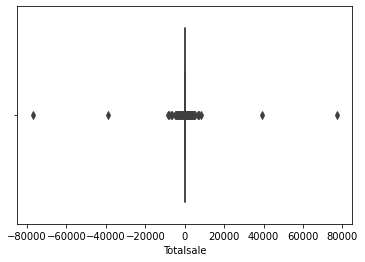

In [ ]:
sns.boxplot(df['Totalsale'])

In [ ]:
# Position of the Outlier
print(np.where(df['Totalsale']>150000))

(array([], dtype=int64),)


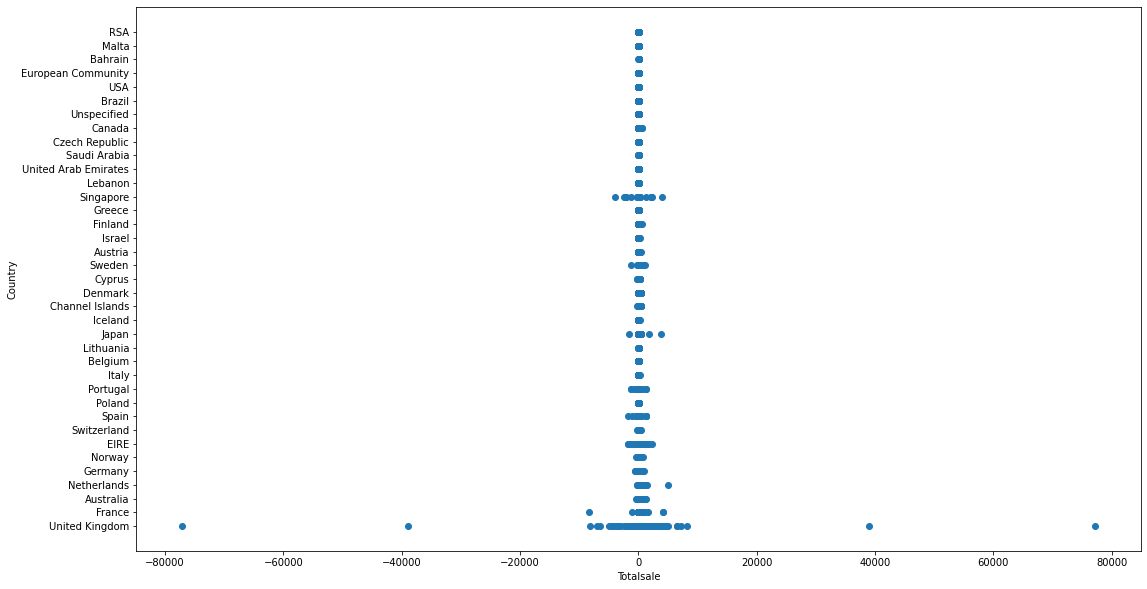

In [ ]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['Totalsale'], df['Country'])
 
# x-axis label
ax.set_xlabel('Totalsale')
# y-axis label
ax.set_ylabel('Country')
plt.show()

In [ ]:
# IQR
Q1 = np.percentile(df['Totalsale'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['Totalsale'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
print(Q1)
print(Q3)
print(IQR)

Old Shape:  (350840, 12)
4.56
19.8
15.240000000000002


In [ ]:
# Upper bound
upper = np.where(df['Totalsale'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Totalsale'] <= (Q1-1.5*IQR))
print(upper)
print(lower)

(array([     9,     26,     27, ..., 350679, 350680, 350681]),)
(array([   141,    235,    239, ..., 350427, 350428, 350615]),)


In [ ]:
df.reset_index(inplace = True)
df

,index,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Month,Year,Season
0,0,536365,1/12/2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,1,2010,Spring
1,1,536365,1/12/2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
2,2,536365,1/12/2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,1,2010,Spring
3,3,536365,1/12/2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
4,4,536365,1/12/2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350835,465217,576214,14-11-2011,23084,RABBIT NIGHT LIGHT,2,2.08,4.16,15863.0,United Kingdom,11,2011,Winter
350836,465218,576214,14-11-2011,22635,CHILDS BREAKFAST SET DOLLY GIRL,1,9.95,9.95,15863.0,United Kingdom,11,2011,Winter
350837,465219,576214,14-11-2011,22138,BAKING SET 9 PIECE RETROSPOT,1,4.95,4.95,15863.0,United Kingdom,11,2011,Winter
350838,465220,576214,14-11-2011,22617,BAKING SET SPACEBOY DESIGN,1,4.95,4.95,15863.0,United Kingdom,11,2011,Winter


In [ ]:
#''' Removing the Outliers '''
df.drop(upper[0], axis=0, inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

df.isnull().sum()
df2=df.dropna(axis=0)
df2.isnull().sum()

New Shape:  (321644, 13)


index          0
InvoiceNo      0
InvoiceDate    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Totalsale      0
CustomerID     0
Country        0
Month          0
Year           0
Season         0
dtype: int64

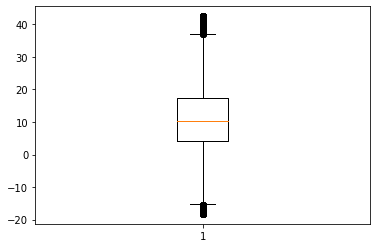

In [ ]:
plt.boxplot(df['Totalsale'])
plt.show()

In [ ]:
df.describe()

,index,Quantity,UnitPrice,Totalsale,CustomerID,Month,Year
count,321644.000000,321644.000000,321644.000000,321644.000000,321644.000000,321644.000000,321644.000000
mean,243043.087354,7.739255,2.790485,11.867274,15310.605968,6.600997,2010.924186
std,133051.042631,10.480615,2.899220,9.415272,1707.229805,3.231414,0.264700
min,0.000000,-720.000000,0.001000,-18.240000,12347.000000,1.000000,2010.000000
25%,130526.750000,2.000000,1.250000,4.200000,13975.000000,4.000000,2011.000000
50%,244788.500000,4.000000,1.690000,10.200000,15218.000000,7.000000,2011.000000
75%,360457.250000,12.000000,3.750000,17.340000,16809.000000,9.000000,2011.000000
max,465221.000000,900.000000,40.460000,42.500000,18287.000000,12.000000,2011.000000


### Biến Quantity

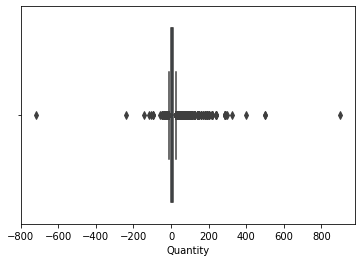

In [ ]:
sns.boxplot(df['Quantity'])

In [ ]:
print("Minimum Quantity", min(df["Quantity"]))
print("Maximum Quantity", max(df["Quantity"]))
df["Quantity"].describe()

Minimum Quantity -720
Maximum Quantity 900


count    321644.000000
mean          7.739255
std          10.480615
min        -720.000000
25%           2.000000
50%           4.000000
75%          12.000000
max         900.000000
Name: Quantity, dtype: float64

In [ ]:
Q1 = np.percentile(df['Quantity'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['Quantity'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
print(Q1)
print(Q3)
print(IQR)

Old Shape:  (321644, 13)
2.0
12.0
10.0


In [ ]:
# Upper bound
upper = np.where(df['Quantity'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Quantity'] <= (Q1-1.5*IQR))
print(upper)
print(lower)

(array([    27,     33,     83, ..., 321624, 321625, 321628]),)
(array([   180,    181,    182,  11735,  12662,  13161,  14834,  17441,
        22149,  22150,  22740,  22741,  22964,  22985,  23151,  23628,
        23629,  23662,  23663,  23664,  25294,  27395,  32567,  39776,
        39777,  39781,  41914,  42044,  50473,  50474,  51092,  51885,
        64890,  67422,  70536,  70585,  70586,  70587,  70588,  70589,
        70590,  70591,  70779,  74307,  75400,  75598,  76527,  76536,
        76537,  76543,  76544,  83497,  83501,  83502,  90476,  90482,
        91461,  91466,  92205,  97372,  97373, 100192, 100193, 100202,
       100203, 100204, 102834, 107879, 107880, 107881, 107882, 107883,
       107884, 114231, 117261, 117388, 120899, 124230, 126450, 126874,
       131987, 133220, 134049, 142033, 142035, 142241, 142245, 142251,
       145396, 154614, 158428, 160006, 162170, 162171, 162172, 162177,
       162301, 164410, 165746, 166634, 167361, 171434, 171444, 171450,
       17525

In [ ]:
df.reset_index(inplace = True)
df

,level_0,index,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Month,Year,Season
0,0,0,536365,1/12/2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,1,2010,Spring
1,1,1,536365,1/12/2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
2,2,2,536365,1/12/2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,1,2010,Spring
3,3,3,536365,1/12/2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
4,4,4,536365,1/12/2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321639,350835,465217,576214,14-11-2011,23084,RABBIT NIGHT LIGHT,2,2.08,4.16,15863.0,United Kingdom,11,2011,Winter
321640,350836,465218,576214,14-11-2011,22635,CHILDS BREAKFAST SET DOLLY GIRL,1,9.95,9.95,15863.0,United Kingdom,11,2011,Winter
321641,350837,465219,576214,14-11-2011,22138,BAKING SET 9 PIECE RETROSPOT,1,4.95,4.95,15863.0,United Kingdom,11,2011,Winter
321642,350838,465220,576214,14-11-2011,22617,BAKING SET SPACEBOY DESIGN,1,4.95,4.95,15863.0,United Kingdom,11,2011,Winter


In [ ]:
df.drop(upper[0], axis=0, inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

df.isnull().sum()
df2=df.dropna(axis=0)
df2.isnull().sum()

New Shape:  (313812, 14)


level_0        0
index          0
InvoiceNo      0
InvoiceDate    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Totalsale      0
CustomerID     0
Country        0
Month          0
Year           0
Season         0
dtype: int64

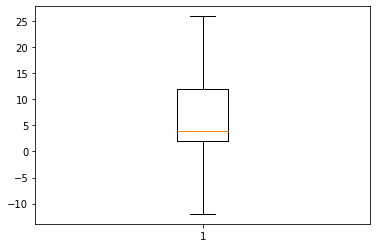

In [ ]:
plt.boxplot(df['Quantity'])
plt.show()

In [ ]:
df.pop('index')
df.pop('level_0')
df.head(5)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Month,Year,Season
0,536365,1/12/2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,1,2010,Spring
1,536365,1/12/2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
2,536365,1/12/2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,1,2010,Spring
3,536365,1/12/2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
4,536365,1/12/2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring


In [ ]:
df.describe()

,Quantity,UnitPrice,Totalsale,CustomerID,Month,Year
count,313812.000000,313812.000000,313812.000000,313812.000000,313812.000000,313812.000000
mean,6.707780,2.848212,11.635802,15316.200168,6.595242,2010.924190
std,6.610819,2.911500,9.231917,1706.864464,3.231593,0.264694
min,-12.000000,0.001000,-18.150000,12347.000000,1.000000,2010.000000
25%,2.000000,1.250000,4.160000,13983.000000,4.000000,2011.000000
50%,4.000000,1.950000,10.200000,15235.000000,7.000000,2011.000000
75%,12.000000,3.750000,17.000000,16813.000000,9.000000,2011.000000
max,26.000000,40.460000,42.500000,18287.000000,12.000000,2011.000000




## Xử lý biến Description

In [ ]:
df.Description.head(10)

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
7                 HAND WARMER UNION JACK
8              HAND WARMER RED POLKA DOT
9             POPPY'S PLAYHOUSE BEDROOM 
Name: Description, dtype: object

In [ ]:
# Bỏ dấu chấm, chuyển các chữ cái về dạng viết thường và bỏ các khoảng trắng
df.Description = df.Description.apply(str.lower)
df.Description = df.Description.apply(lambda x: x.replace(".", "").strip())
df.Description.head(10)

0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
5           set 7 babushka nesting boxes
6      glass star frosted t-light holder
7                 hand warmer union jack
8              hand warmer red polka dot
9              poppy's playhouse bedroom
Name: Description, dtype: object

In [ ]:
# Bỏ các stopword (a, an, and,...), bỏ các dấu và chữ số
df.Description = df.Description.apply(lambda x: remove_stopwords(x).translate(str.maketrans('','',string.punctuation)) .translate(str.maketrans('','',string.digits)))
df.Description.head(10)

0      white hanging heart tlight holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
5            set  babushka nesting boxes
6       glass star frosted tlight holder
7                 hand warmer union jack
8              hand warmer red polka dot
9               poppys playhouse bedroom
Name: Description, dtype: object

# **Xuất ra file CSV/Excel**

In [ ]:
df.to_csv("data_cleaned.csv")

# Phân tích dữ liệu (Timeseries và FP-Gr)


In [ ]:
def barplot_percentage(column, title="", slice=12):
    # number of rows
    total = df.shape[0]

    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.barplot(df[column].value_counts()[: slice].index, df[column].value_counts()[: slice])
    ax.set_title(title)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{percentage}', (x + width/2, y + height*1.02), ha='center')

    plt.ylabel("Count")
    plt.show()

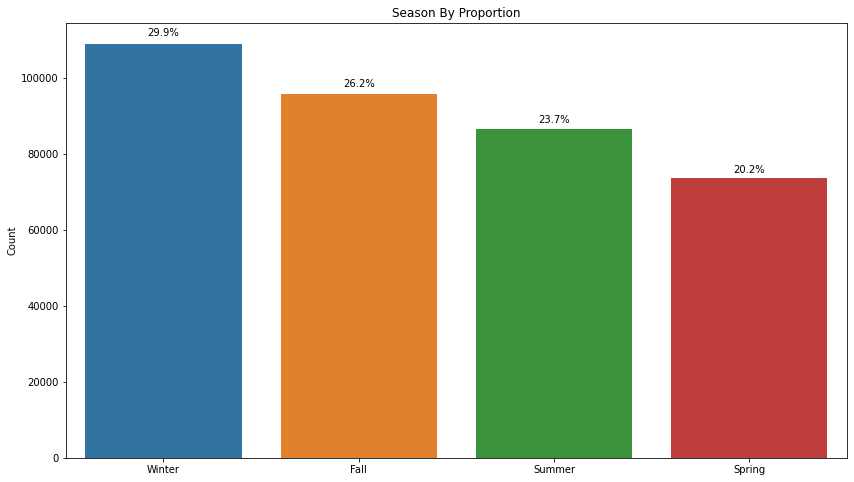

In [ ]:
barplot_percentage("Season", "Season By Proportion",4)

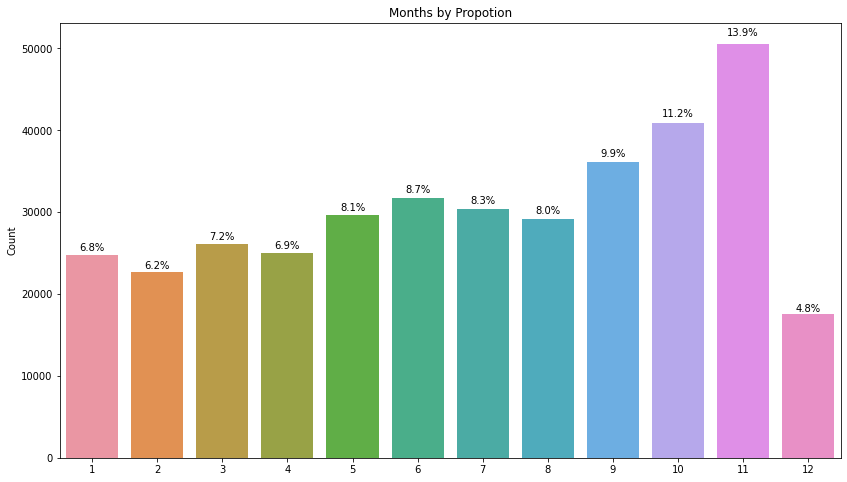

In [ ]:
barplot_percentage("Month", "Months by Propotion")

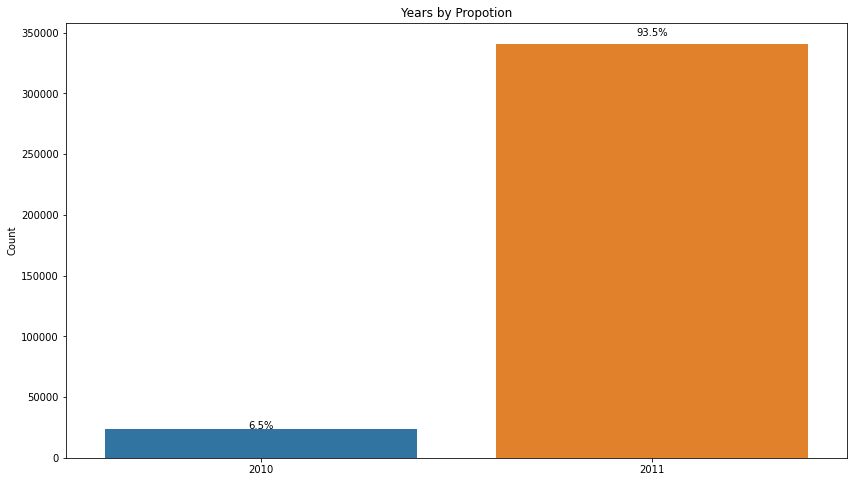

In [ ]:
barplot_percentage("Year", "Years by Propotion")

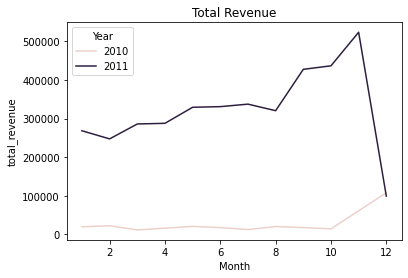

In [ ]:
df_test = df.groupby(['Year','Month']).agg(total_revenue=('Totalsale','sum'))
sns.lineplot(data = df_test, x = "Month",y = "total_revenue",hue ='Year')
plt.title('Total Revenue')

plt.show()

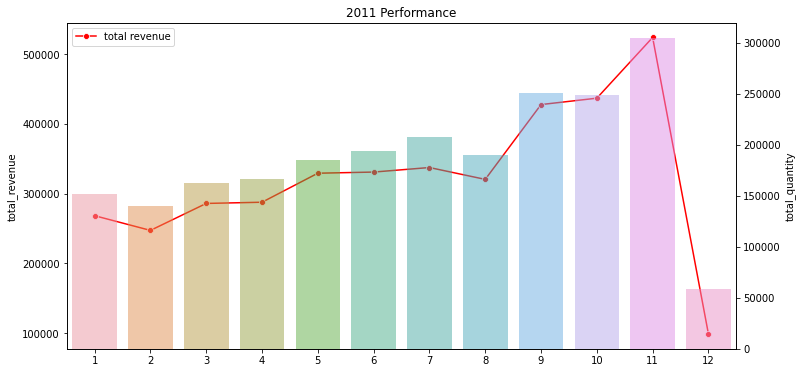

In [ ]:
df_test = df[df['Year']==2011].groupby('Month',as_index = False).agg(total_quantity = ("Quantity","sum"),total_revenue = ("Totalsale","sum"))
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = df_test['total_revenue'], marker='o', sort = False,label = 'total revenue', ax=ax1,color='red')
ax2 = ax1.twinx()
sns.barplot(data = df_test, x='Month', y='total_quantity', alpha=0.5 ,ax=ax2)
plt.title('2011 Performance')
plt.xlabel('Month')
plt.show()

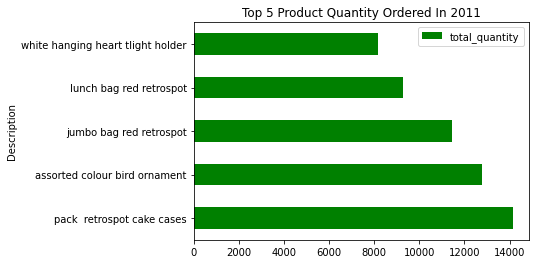

In [ ]:
df_qty = df[df['Year'] == 2011].groupby('Description',as_index = False).agg(total_quantity = ('Quantity','sum'))
df_qty.sort_values(by='total_quantity',ascending = False,inplace = True)
df_qty.iloc[:5].plot(kind = 'barh',x="Description",color = 'green',y='total_quantity')
plt.title('Top 5 Product Quantity Ordered In 2011')
plt.show()

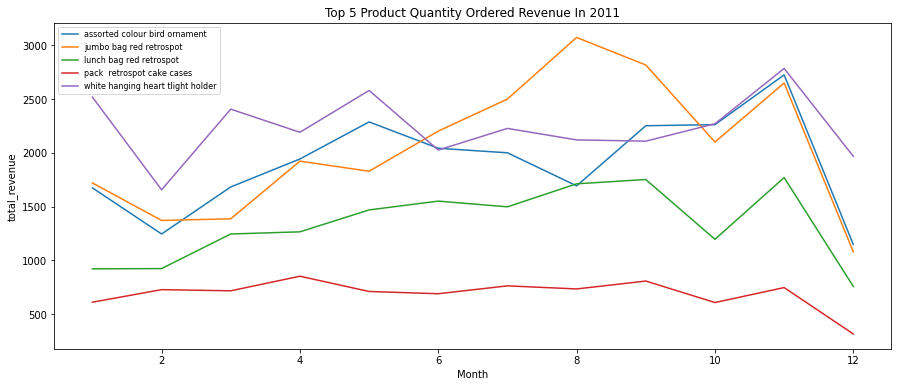

In [ ]:
fig,ax1 = plt.subplots(figsize=(15,6))
top5 = [x for x in df_qty.iloc[:5].Description]
top5_df = df[df['Description'].isin(top5)]
top5_df_rev = top5_df.groupby(['Description','Month'], as_index = False).agg(total_revenue = ('Totalsale','sum'))
sns.lineplot(data = top5_df_rev, x = "Month", y = "total_revenue", hue = 'Description', ax = ax1)
plt.legend(fontsize = 8,loc = 'upper left')
plt.title('Top 5 Product Quantity Ordered Revenue In 2011')
plt.show()


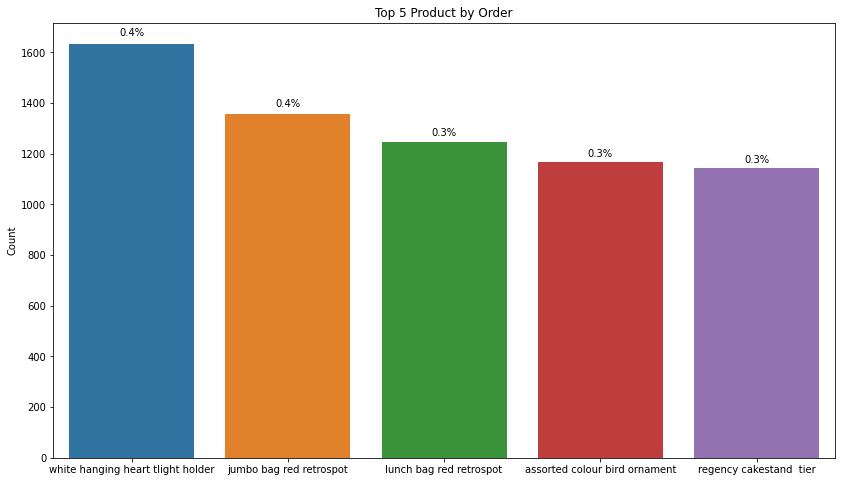

In [ ]:
barplot_percentage("Description", "Top 5 Product by Order", 5)

## **FP-Growth**

In [ ]:
df_fp = pd.read_csv('/content/data_cleaned.csv', index_col = 0)

In [ ]:
df_sample = df_fp.sample(n = 350000, random_state=8)
df_sample

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Month,Year,Season
356744,579747,2011-11-30,47559B,tea time oven glove,10,1.25,12.50,12528.0,Germany,11,2011,Winter
107222,551059,2011-04-26,48184,doormat english rose,1,7.95,7.95,13668.0,United Kingdom,4,2011,Summer
371135,581325,2011-08-12,22966,gingerbread man cookie cutter,2,1.25,2.50,15877.0,United Kingdom,8,2011,Fall
54534,544293,2011-02-17,22028,penny farthing birthday card,12,0.42,5.04,17954.0,United Kingdom,2,2011,Spring
115923,552318,2011-08-05,22227,hanging heart mirror decoration,3,0.65,1.95,17231.0,United Kingdom,8,2011,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...
202323,563776,2011-08-19,21731,red toadstool led night light,12,1.65,19.80,12600.0,Germany,8,2011,Fall
232203,567378,2011-09-20,23389,spaceboy mini backpack,4,4.15,16.60,14911.0,EIRE,9,2011,Fall
54827,544305,2011-02-17,82483,wood drawer cabinet white finish,2,6.95,13.90,15044.0,United Kingdom,2,2011,Spring
44348,542779,2011-01-02,22861,easter tin chicks garden,6,1.65,9.90,17147.0,United Kingdom,1,2011,Spring


In [ ]:
invoices_ids = df_sample.InvoiceNo.unique()[: 200]
invoices_ids

array(['579747', '551059', '581325', '544293', '552318', '544666',
       '574310', '554132', '578633', '578079', '561081', '577337',
       '551542', '564168', '542147', '573392', '550446', '557129',
       '548974', '567524', '579273', '544460', '578922', '575753',
       '541240', '581095', '568050', '580399', '580032', '569866',
       '541848', '581412', '548497', '571408', '579536', '555638',
       '559542', '577493', '549716', '552308', '552336', '544904',
       '563906', '578041', '564066', '537137', '581538', '576255',
       '549667', '572076', '577106', '550723', '581146', '560974',
       '542102', '537890', '573362', '553663', '557776', '558196',
       '546755', '540533', '555500', '577695', '578843', '573500',
       '575698', '541511', '565366', '561650', '543370', '570455',
       '565152', '575612', '574660', '549250', '547841', '553074',
       '542100', '556198', '537257', '540508', '577609', '562593',
       '544391', '573123', '553057', '563505', '570223', '5474

In [ ]:
all_items = []
for val in invoices_ids:
    general_items = df_sample[df_sample['InvoiceNo'] == val]['Description'].unique()
    all_items.append(list(general_items))

from functools import reduce

flatten_list = reduce(lambda z, y :z + y, all_items)
flatten_list = set(flatten_list)

fp_growth_df = pd.DataFrame(index=invoices_ids, columns=flatten_list)
fp_growth_df.fillna(0, inplace=True)
fp_growth_df.head()

,carrot charlielola coaster set,swiss roll towel chocolate spots,easter craft ivy wreath chick,assorted tutti frutti fob notebook,travel card wallet union jack,boom box speaker girls,redcream stripe cushion cover,milk maids mug,place setting white heart,drawer antique white wood cabinet,...,red toadstool led night light,home sweet home key holder,queens guard coffee mug,mint kitchen scales,christmas retrospot tree wood,pink regency teacup saucer,skulls greeting card,bread bin diner style red,mini playing cards buffalo,blue paisley tissue box
579747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for val in invoices_ids:
    general_items = df_sample[df_sample['InvoiceNo'] == val]['Description'].unique()
    for item in general_items:
        fp_growth_df.loc[val][item] = 1
fp_growth_df.head()

,carrot charlielola coaster set,swiss roll towel chocolate spots,easter craft ivy wreath chick,assorted tutti frutti fob notebook,travel card wallet union jack,boom box speaker girls,redcream stripe cushion cover,milk maids mug,place setting white heart,drawer antique white wood cabinet,...,red toadstool led night light,home sweet home key holder,queens guard coffee mug,mint kitchen scales,christmas retrospot tree wood,pink regency teacup saucer,skulls greeting card,bread bin diner style red,mini playing cards buffalo,blue paisley tissue box
579747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
544293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
res = fpgrowth(fp_growth_df, min_support=0.05, use_colnames=True)
res.head(10)

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.060,(set red polkadot party candles)
1,0.055,(pink fairy cake childrens apron)
2,0.105,(charlotte bag suki design)
3,0.085,(strawberry charlotte bag)
4,0.110,(gingerbread man cookie cutter)
5,0.085,(vintage snap cards)
6,0.070,(vintage heads tails card game)
7,0.060,(wooden box dominoes)
8,0.055,(victorian glass hanging tlight)
9,0.050,(wooden school colouring set)


In [ ]:
res.shape

(231, 2)

In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
res = association_rules(res, metric="lift", min_threshold=1)

In [ ]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(strawberry charlotte bag),(charlotte bag suki design),0.085,0.105,0.050,0.588235,5.602241,0.041075,2.173571
1,(charlotte bag suki design),(strawberry charlotte bag),0.105,0.085,0.050,0.476190,5.602241,0.041075,1.746818
2,(lunch bag spaceboy design),(lunch bag red retrospot),0.125,0.135,0.070,0.560000,4.148148,0.053125,1.965909
3,(lunch bag red retrospot),(lunch bag spaceboy design),0.135,0.125,0.070,0.518519,4.148148,0.053125,1.817308
4,(lunch bag pink polkadot),(lunch bag spaceboy design),0.130,0.125,0.075,0.576923,4.615385,0.058750,2.068182
...,...,...,...,...,...,...,...,...,...
121,(lunch bag red retrospot),(lunch bag woodland),0.135,0.100,0.050,0.370370,3.703704,0.036500,1.429412
122,(lunch bag spaceboy design),(lunch bag woodland),0.125,0.100,0.055,0.440000,4.400000,0.042500,1.607143
123,(lunch bag woodland),(lunch bag spaceboy design),0.100,0.125,0.055,0.550000,4.400000,0.042500,1.944444
124,(lunch bag pink polkadot),(lunch bag woodland),0.130,0.100,0.055,0.423077,4.230769,0.042000,1.560000


In [ ]:
res.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(poppys playhouse bathroom, poppys playhouse l...",(poppys playhouse bedroom),0.050,0.070,0.050,1.00000,14.285714,0.046500,inf
104,"(poppys playhouse bathroom, poppys playhouse k...",(poppys playhouse bedroom),0.050,0.070,0.050,1.00000,14.285714,0.046500,inf
86,"(poppys playhouse livingroom, poppys playhouse...",(poppys playhouse bedroom),0.050,0.070,0.050,1.00000,14.285714,0.046500,inf
91,(poppys playhouse bathroom),(poppys playhouse bedroom),0.055,0.070,0.055,1.00000,14.285714,0.051150,inf
81,(poppys playhouse livingroom),(poppys playhouse bedroom),0.055,0.070,0.055,1.00000,14.285714,0.051150,inf
...,...,...,...,...,...,...,...,...,...
21,(lunch bag red retrospot),(red retrospot charlotte bag),0.135,0.095,0.050,0.37037,3.898635,0.037175,1.437353
57,(lunch bag red retrospot),(lunch bag cars blue),0.135,0.125,0.050,0.37037,2.962963,0.033125,1.389706
13,(lunch bag red retrospot),"(lunch bag pink polkadot, lunch bag spaceboy d...",0.135,0.075,0.050,0.37037,4.938272,0.039875,1.469118
25,(lunch bag red retrospot),(lunch bag suki design),0.135,0.095,0.050,0.37037,3.898635,0.037175,1.437353


In [ ]:
res_temp = res[res['confidence']>=0.75]
res_temp = res_temp.sort_values('confidence', ascending = False)
res_temp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
86,"(poppys playhouse livingroom, poppys playhouse...",(poppys playhouse bedroom),0.050,0.070,0.050,1.000000,14.285714,0.046500,inf
91,(poppys playhouse bathroom),(poppys playhouse bedroom),0.055,0.070,0.055,1.000000,14.285714,0.051150,inf
104,"(poppys playhouse bathroom, poppys playhouse k...",(poppys playhouse bedroom),0.050,0.070,0.050,1.000000,14.285714,0.046500,inf
81,(poppys playhouse livingroom),(poppys playhouse bedroom),0.055,0.070,0.055,1.000000,14.285714,0.051150,inf
98,"(poppys playhouse bathroom, poppys playhouse l...",(poppys playhouse bedroom),0.050,0.070,0.050,1.000000,14.285714,0.046500,inf
78,(poppys playhouse bedroom),(poppys playhouse kitchen),0.070,0.070,0.065,0.928571,13.265306,0.060100,13.020000
79,(poppys playhouse kitchen),(poppys playhouse bedroom),0.070,0.070,0.065,0.928571,13.265306,0.060100,13.020000
88,(poppys playhouse livingroom),"(poppys playhouse bedroom, poppys playhouse ki...",0.055,0.065,0.050,0.909091,13.986014,0.046425,10.285000
96,"(poppys playhouse bedroom, poppys playhouse ba...",(poppys playhouse livingroom),0.055,0.055,0.050,0.909091,16.528926,0.046975,10.395000
94,(poppys playhouse bathroom),(poppys playhouse kitchen),0.055,0.070,0.050,0.909091,12.987013,0.046150,10.230000


In [ ]:
res_temp = res_temp[['antecedents', 'consequents']]

In [ ]:
res_temp.reset_index(drop = True, inplace = True)
res_temp = res_temp.iloc[0:5,]
res_temp

,antecedents,consequents
0,"(poppys playhouse livingroom, poppys playhouse...",(poppys playhouse bedroom)
1,(poppys playhouse bathroom),(poppys playhouse bedroom)
2,"(poppys playhouse bathroom, poppys playhouse k...",(poppys playhouse bedroom)
3,(poppys playhouse livingroom),(poppys playhouse bedroom)
4,"(poppys playhouse bathroom, poppys playhouse l...",(poppys playhouse bedroom)


In [ ]:
df_condition = df_fp[['InvoiceNo', 'Description', 'Season', 'Quantity']]
df_condition.reset_index(drop = True, inplace = True)
df_condition

,InvoiceNo,Description,Season,Quantity
0,579747,tea time oven glove,Winter,10
1,551059,doormat english rose,Summer,1
2,581325,gingerbread man cookie cutter,Fall,2
3,544293,penny farthing birthday card,Spring,12
4,552318,hanging heart mirror decoration,Fall,3
...,...,...,...,...
349995,563776,red toadstool led night light,Fall,12
349996,567378,spaceboy mini backpack,Fall,4
349997,544305,wood drawer cabinet white finish,Spring,2
349998,542779,easter tin chicks garden,Spring,6


In [ ]:
df_res_1 = df_condition[(df_condition['Description'] == 'poppys playhouse kitchen') | (df_condition['Description'] == 'poppys playhouse livingroom') | (df_condition['Description'] == 'poppys playhouse bedroom') | (df_condition['Description'] == 'poppys playhouse bathroom')] 
df_res_1

,InvoiceNo,Description,Season,Quantity
201,558555,poppys playhouse bedroom,Summer,1
353,566010,poppys playhouse bedroom,Fall,2
517,537335,poppys playhouse livingroom,Summer,1
902,540813,poppys playhouse bedroom,Winter,3
1520,538174,poppys playhouse kitchen,Winter,6
...,...,...,...,...
349001,561125,poppys playhouse livingroom,Fall,6
349144,545022,poppys playhouse kitchen,Spring,6
349147,569026,poppys playhouse bedroom,Fall,6
349181,551352,poppys playhouse bedroom,Summer,6


In [ ]:
df_res_1 = df_res_1.groupby(by = ['Season'], as_index=False)['Quantity'].sum()
df_res_1

,Season,Quantity
0,Fall,1230
1,Spring,1081
2,Summer,769
3,Winter,1275


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
def plotting(data, number_des, *args):
  hue_order = ["Spring", "Summer", "Fall", "Winter"]
  sbn.set(font_scale = 2)
  sbn.barplot(x = 'Season', y = 'Quantity', hue = "Season", hue_order = hue_order, data = data, order = ["Spring", "Summer", "Fall", "Winter"], dodge=False)
  plt.xlabel('Season', color = "red", size = 24)
  plt.ylabel('Quantity', color = "purple", size = 24)
  if (number_des == 2):
    plt.title('DOANH SỐ BÁN HÀNG THEO MÙA CỦA CÁC MẶT HÀNG: %s, %s' % (args), y=-0.15, color = "blue", size = 24)
  elif (number_des == 3):
    plt.title('DOANH SỐ BÁN HÀNG THEO MÙA CỦA CÁC MẶT HÀNG: %s, %s, %s' % (args), y=-0.15, color = "blue", size = 24)
  else:
    plt.title('DOANH SỐ BÁN HÀNG THEO MÙA CỦA CÁC MẶT HÀNG: %s, %s, %s, %s' % (args), y=-0.15, color = "blue", size = 24)
  plt.gcf().set_size_inches(20,18)
  plt.show()

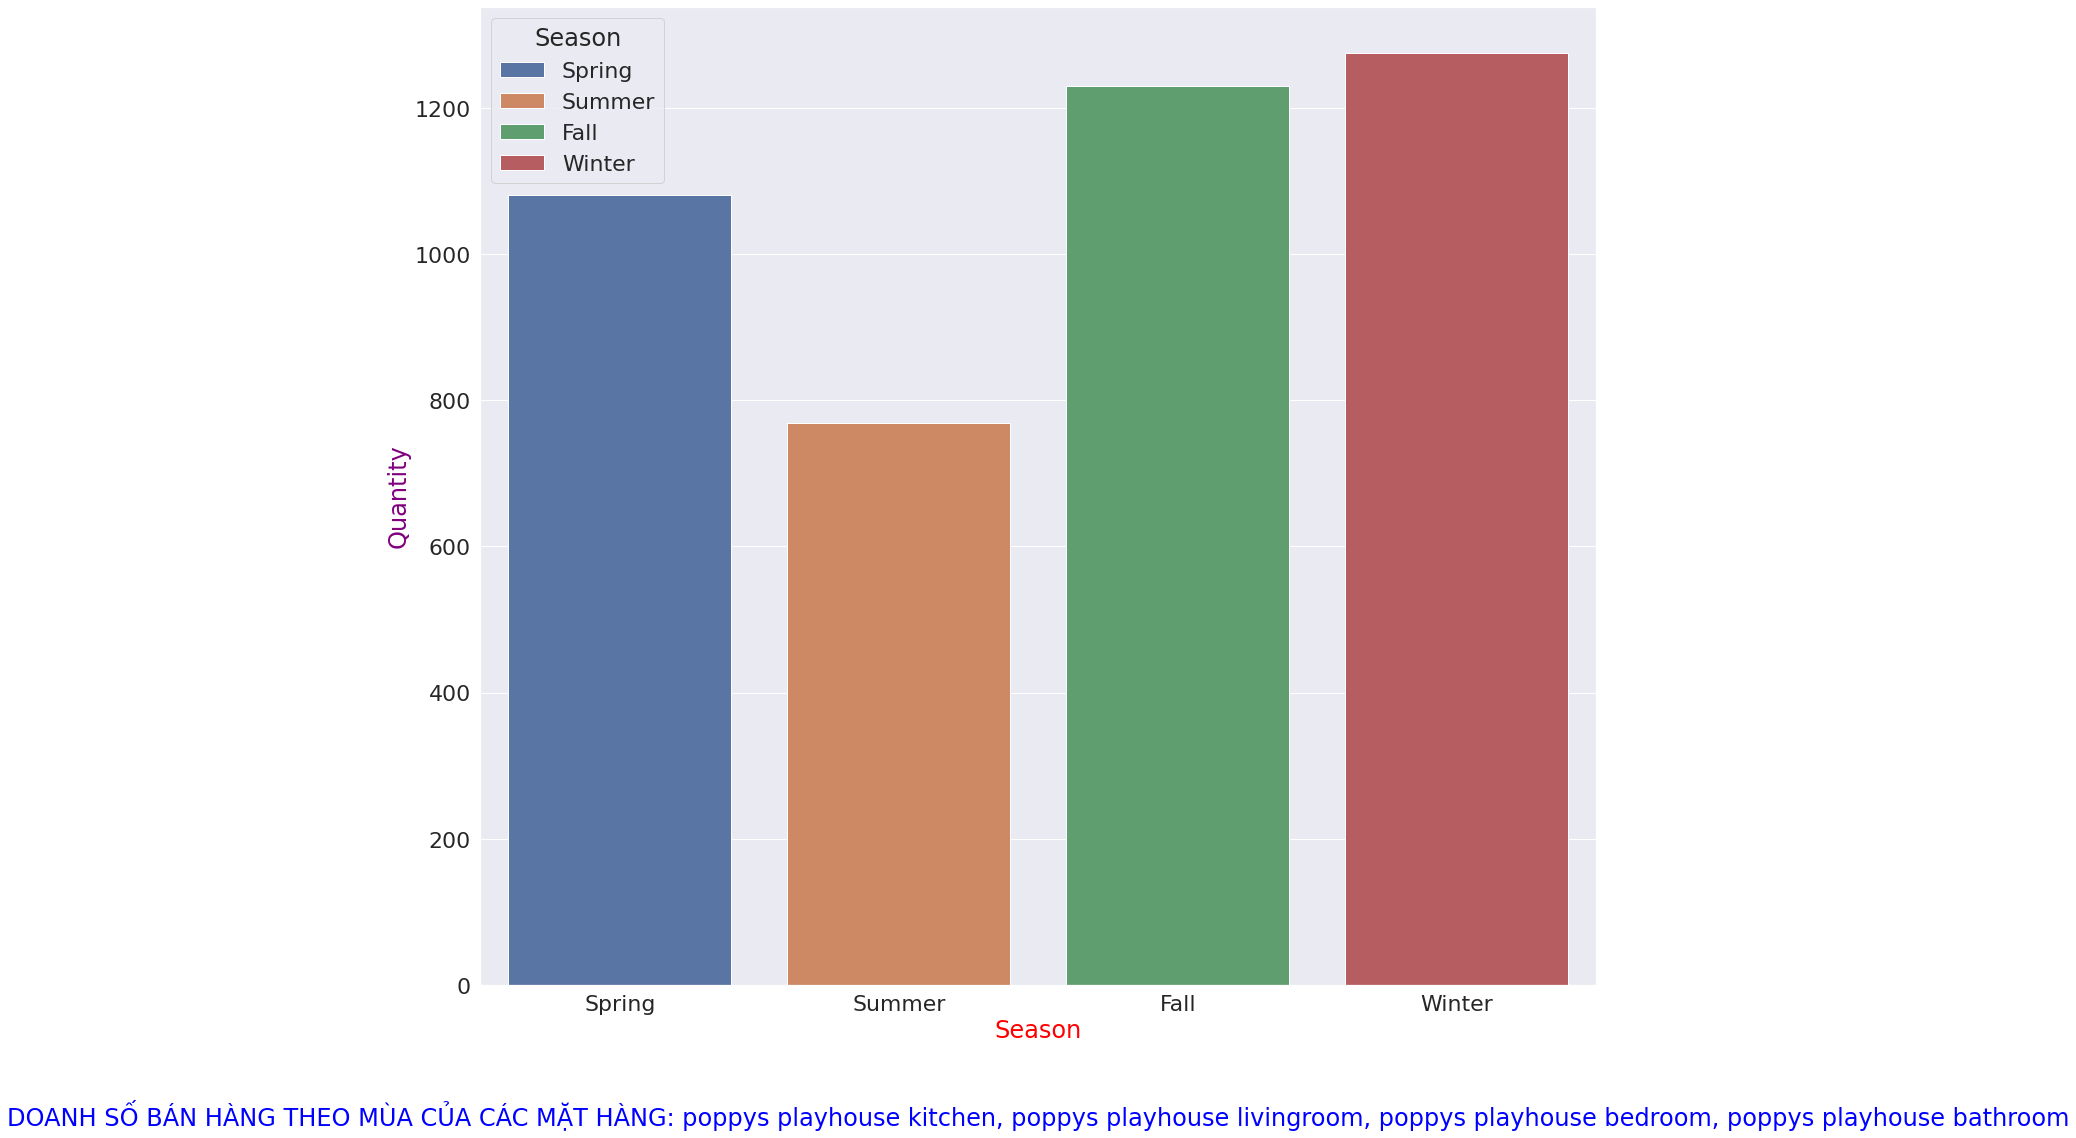

In [ ]:
plotting(df_res_1, 4, "poppys playhouse kitchen", "poppys playhouse livingroom", "poppys playhouse bedroom", "poppys playhouse bathroom")

# Machine Learning:



##Clustering: Customer Segmentation by Country and Behavior

In [ ]:
data = pd.read_csv('/content/data_cleaned.csv', index_col = 0)
data.head(3)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Month,Year,Season
0,536365,01-12-2010,85123A,white hanging heart tlight holder,6,2.55,15.30,17850.0,United Kingdom,1,2010,Spring
1,536365,01-12-2010,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring
2,536365,01-12-2010,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,1,2010,Spring


In [ ]:
# Gán nhãn Country theo UK và non-UK
df1 = data.copy()
df1['Country'] = df1['Country'].map(lambda x: 'UK' if x == 'United Kingdom' else 'non-UK')

# Group by theo CustomerID và Location
df2 = df1.groupby(['CustomerID','Country'], sort=False).agg({'Quantity':'mean','UnitPrice':'mean','InvoiceNo':'nunique','Description':'nunique'})
df2.reset_index(inplace=True)
df2.columns = ['CustomerID', 'Country', 'Avg. Quantity', 'Avg. Price', 'Frequency', '# of Products']
df2.head(5)

,CustomerID,Country,Avg. Quantity,Avg. Price,Frequency,# of Products
0,17850.0,UK,5.549669,3.085132,35,24
1,13047.0,UK,6.922581,4.104903,14,81
2,12583.0,non-UK,13.434783,2.748406,12,83
3,14688.0,UK,8.633466,1.873147,20,113
4,17809.0,UK,8.235294,1.563529,4,17


In [ ]:
#Chuẩn hóa dữ liệu các thuộc tính numeric đầu ra
Scaler = StandardScaler()
df2.iloc[:,2:] = Scaler.fit_transform(df2.iloc[:,2:])
syms = df2.iloc[:,0].values.astype(str)
D = df2.iloc[:,1:].values.astype(object)

> Số clusters: 2
     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm):  11874.36869351192
> Số clusters: 3
     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm):  9258.456559650229
> Số clusters: 4
     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm):  7997.437562430493
> Số clusters: 5
     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm):  5953.037491270736
> Số clusters: 6
     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm):  5274.734734939811
> Số clusters: 7
     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm):  4617.631784342923


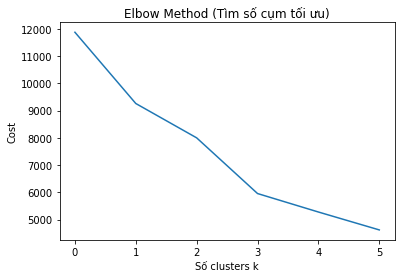

In [ ]:
#Tìm số k phân cụm tối ưu 
cost = []
for k in range(2,8):
    kproto = KPrototypes(n_clusters = k, init = 'Cao')
    clusters = kproto.fit_predict(D, categorical=[0])
    print('> Số clusters:', k)
    print('     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm): ', kproto.cost_)
    cost.append(kproto.cost_)

plt.xlabel('Số clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method (Tìm số cụm tối ưu)')
plt.plot(cost)

In [ ]:
#Phân cụm bằng phương pháp KPrototypes với k = 3 
kproto = KPrototypes(n_clusters = 3, init = 'Cao')
clusters = kproto.fit_predict(D, categorical = [0])
print('Cluster Centers:\n', kproto.cluster_centroids_)

Cluster Centers:
 [['0.8236686780370774' '-0.454734030940422' '-0.1255907621556271'
  '-0.23105592440575345' 'UK']
 ['-0.29132553731241795' '-0.22728458000385887' '1.996438222101767'
  '2.3613595474694544' 'UK']
 ['-0.7218279984661973' '0.45706022712061994' '-0.18441344034722326'
  '-0.1414119608707284' 'UK']]


In [ ]:
# Chuẩn hóa về giá trị ban đầu và truy xuất tất cả các thuộc tính 
Clustered = pd.DataFrame(data=Scaler.inverse_transform(df2.iloc[:,2:]),columns=['Avg. Quantity', 'Avg. Price', 'Frequency', '# of Products'])
Clustered['Country'] = D[:,0]
Clustered['CustomerID'] = syms
Clustered['Cluster'] = clusters
print(Clustered.groupby(['Cluster','Country']).count()['Frequency'],'\n\n')
print(Clustered.groupby(['Cluster','Country']).mean())

Cluster  Country
0        UK         1417
         non-UK      210
1        UK          240
         non-UK       24
2        UK         1625
         non-UK      125
Name: Frequency, dtype: int64 


                 Avg. Quantity  Avg. Price  Frequency  # of Products
Cluster Country                                                     
0       UK           11.459735    2.336782   3.199718      33.446013
        non-UK       11.376194    2.753056   2.761905      43.504762
1       UK            6.348617    2.792402  17.329167     214.225000
        non-UK        9.494587    2.760313  20.833333     248.833333
2       UK            4.655760    3.870131   2.695385      41.446769
        non-UK        6.336113    5.546981   3.336000      36.024000


In [ ]:
# Chuẩn hóa về giá trị ban đầu và truy xuất tất cả các thuộc tính 
Clustered = pd.DataFrame(data=Scaler.inverse_transform(df2.iloc[:,2:]),columns=['Avg. Quantity', 'Avg. Price', 'Frequency', '# of Products'])
Clustered['Country'] = D[:,0]
Clustered['CustomerID'] = syms
Clustered['Cluster'] = clusters
print(Clustered.groupby(['Cluster','Country']).count()['Frequency'],'\n\n')
print(Clustered.groupby(['Cluster','Country']).mean())

Cluster  Country
0        UK          270
         non-UK       25
1        UK         1419
         non-UK      211
2        UK         1593
         non-UK      123
Name: Frequency, dtype: int64 


                 Avg. Quantity  Avg. Price  Frequency  # of Products
Cluster Country                                                     
0       UK            6.265791    2.785606  16.337037     205.992593
        non-UK        9.317910    2.739636  20.120000     246.120000
1       UK           11.441239    2.339006   3.169133      33.184637
        non-UK       11.366225    2.758829   2.772512      43.592417
2       UK            4.645851    3.891523   2.614564      39.831136
        non-UK        6.322470    5.586652   3.325203      34.634146


In [ ]:
Clustered.head(5)

,Avg. Quantity,Avg. Price,Frequency,# of Products,Country,CustomerID,Cluster
0,5.549669,3.085132,35.0,24.0,UK,17850.0,1
1,6.922581,4.104903,14.0,81.0,UK,13047.0,2
2,13.434783,2.748406,12.0,83.0,non-UK,12583.0,0
3,8.633466,1.873147,20.0,113.0,UK,14688.0,1
4,8.235294,1.563529,4.0,17.0,UK,17809.0,0


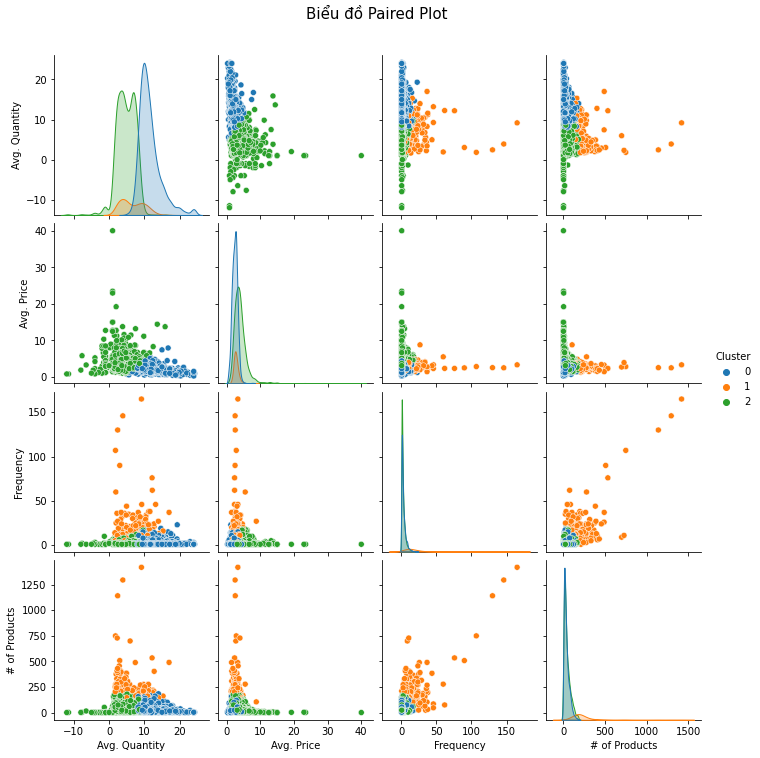

In [ ]:
# Vẽ biểu đồ lưới pair plot
sns.pairplot(Clustered.drop(columns=['Country','CustomerID']), hue='Cluster', palette='tab10')
plt.suptitle('Biểu đồ Paired Plot', fontsize = 15, y = 1.05)
plt.show()

##Group Category By Product Name:

In [ ]:
df.Description.head(10)

0      white hanging heart tlight holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
5            set  babushka nesting boxes
6       glass star frosted tlight holder
7                 hand warmer union jack
8              hand warmer red polka dot
9               poppys playhouse bedroom
Name: Description, dtype: object

In [ ]:
# Chuẩn bị dữ liệu
items_temp = df.groupby('StockCode').Description.unique()
items = list(zip(items_temp.index.tolist(),items_temp.values.tolist()))
description = [x[1][0] for x in items] 
n_description = pd.Series([x[1][0] for x in items]) 
print(n_description)

0       inflatable political globe
1         groovy cactus inflatable
2                     doggy rubber
3             hearts wrapping tape
4         spots red bookcover tape
                   ...            
3613                      discount
3614                dotcom postage
3615                        manual
3616           pads match cushions
3617                       postage
Length: 3618, dtype: object


In [ ]:

tks = [nltk.word_tokenize(x) for x in description]
descs_p = []
for x in tks:
    temp = nltk.pos_tag(x)
    new_desc = []
    for y in temp:
        word,tag = y
        if tag.startswith('N'):
            new_desc.append(word)
        else:
            pass
    descs_p.append(new_desc)
descs_p = pd.Series(descs_p)
print(descs_p)

0                        [globe]
1               [groovy, cactus]
2                       [rubber]
3                 [hearts, tape]
4       [spots, bookcover, tape]
                  ...           
3613                  [discount]
3614           [dotcom, postage]
3615                          []
3616            [pads, cushions]
3617                   [postage]
Length: 3618, dtype: object


In [ ]:
# Đưa về dạng từ cán
def stemSentence_list(sentence):
    porter = PorterStemmer()
    stem_sentence = [porter.stem(word) for word in sentence]
    return ' '.join(stem_sentence)

def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = nltk.word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)
stem_descs = descs_p.apply(lambda x: stemSentence_list(x))
print(stem_descs)

0                   globe
1            groovi cactu
2                  rubber
3              heart tape
4       spot bookcov tape
              ...        
3613             discount
3614        dotcom postag
3615                     
3616          pad cushion
3617               postag
Length: 3618, dtype: object


In [ ]:
# Loại bỏ từ chỉ màu sắc
colors = list(webcolors.CSS3_NAMES_TO_HEX)
colors = [stemSentence(x) for x in colors]

color_removed_desc = [' '.join([x for x in string.split() if x not in colors]) for string in stem_descs]
print(color_removed_desc)

['globe', 'groovi cactu', 'rubber', 'heart tape', 'spot bookcov tape', 'armi camo bookcov tape', 'mini funki design tape', 'pencil tube', 'pencil tube', 'design car pen', 'fan frame', 'paper pocket fan', 'colour fan', 'sandalwood fan', 'paper parasol', 'paper parasol', 'paper parasol', 'paper parasol', 'parasol', 'parasol', 'parasol', 'polkadot garden parasol', 'polkadot parasol', 'ice cream design garden parasol', 'cake design umbrella', 'fold edg', 'scissor wknif s', 'anim sticker', 'fooddrink spong sticker', 'style scissor', 'medium style scissor', 'style scissor', 'stationeri box set', 'art push rubber', 'case pen', 'teatim round pencil sharpen', 'rubber', 'popart rect pencil sharpen asst', 'flower', 'wrap carousel', 'wrap fairi cake', 'wrap hair day', 'wrap flock', 'wrap english', 'wrap suki friend', 'gift bag', 'gift bag xxcm', 'funki monkey gift bag medium', 'wrap s christma', 'wrap folk art', 'wrap daisi carpet', 'wrap folkart', 'wrap folkart', 'pastel photo album', 'pastel pho

In [ ]:
# Vectorize word
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(color_removed_desc)
matrix_1 = pd.concat([n_description,pd.DataFrame(X_ntf.toarray(),columns = vectorizer_ntf.get_feature_names())],axis = 1)
matrix_1.rename(columns = {0:'Description'}, inplace = True)
matrix_1[['Description','globe','tape','bookcov','parasol','paper','bookcov tape','design','design tape']].head(20)

,Description,globe,tape,bookcov,parasol,paper,bookcov tape,design,design tape
0,inflatable political globe,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,groovy cactus inflatable,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,doggy rubber,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,hearts wrapping tape,0.0,0.562517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,spots red bookcover tape,0.0,0.379263,0.487066,0.000000,0.000000,0.487066,0.000000,0.000000
5,army camo bookcover tape,0.0,0.298349,0.383153,0.000000,0.000000,0.383153,0.000000,0.000000
6,mini funky design tapes,0.0,0.337426,0.000000,0.000000,0.000000,0.000000,0.235430,0.455042
7,colouring pencils brown tube,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,colouring pencils brown tube,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,asstd design racing car pen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.271405,0.000000


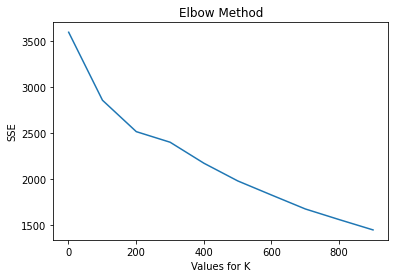

In [ ]:
# k-mean
desc4 = color_removed_desc
sse = {}
for k in np.arange(1,1000,100):
    kmeans = KMeans(n_clusters=k, max_iter=4000).fit(X_ntf)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [ ]:
# SSE tại k = 300
kmeans = KMeans(n_clusters=300)
kmeans.fit(X_ntf)
print(kmeans.inertia_)

2405.309275444481


In [ ]:
# Với k = 300, ta phân được các lớp như bên dưới.
result = pd.concat([n_description,pd.DataFrame(X_ntf.toarray(),columns=vectorizer_ntf.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X_ntf)
result.rename(columns = {0:'Description'}, inplace = True)

clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Description' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')
labels_table.head(200)

,cluster,label
0,231,
1,110,rubber
2,192,pencil tube
3,149,pen
4,28,paper parasol
...,...,...
195,265,crackl drawer glaze knob
196,171,paper point
197,185,acapulco mat
198,212,flower heart


In [ ]:
# Kiểm tra qua các lớp và loại bỏ các từ không hợp lí ảnh hưởng đến phân cụm
drop_list = ['art','font','cottag','picnic','frutti','tuitt','coffe','english','rubi','morri','glasssilv','gemston','jet','la','vega','shopper','gingham','bathroom','billboard','glass','circl','shop','shoulder','diamant','mini','murano','twist','sweetheart','raffia','london','disco','cherri','size','cooki','dog','feltcraft','fruit','jam','magic','piec','lace','garden','lunch','union','jack','round','wash','stripe','craft','woodland','cake','zinc','trinket','plant','lattic','skull','charlott','charlielola','eau','nile','crystal','baroqu','bfli','butterfli','orbit','tea','time','henrietta','hen','colour','plastic','retro','dot','wooden','chick','kid','bird','cat','babushka','shape','child','metal','flannel','reel','retrospot','choic','king','dinner','cm','polyest','charlot','charli','lola','biscuit','christma','fairi','incens','style','boudicca','medina','love','birthday','set','polkadot','children','parti','home','vintag','wood','paisley','bird','appl','design','tlight']

In [ ]:
# Phân cụm lại sau khi loại bỏ các từ không hợp lí
final = [' '.join([x for x in string.split() if x not in drop_list]) for string in color_removed_desc]
print(final)
X_ntf_2 = vectorizer_ntf.fit_transform(final)

['globe', 'groovi cactu', 'rubber', 'heart tape', 'spot bookcov tape', 'armi camo bookcov tape', 'funki tape', 'pencil tube', 'pencil tube', 'car pen', 'fan frame', 'paper pocket fan', 'fan', 'sandalwood fan', 'paper parasol', 'paper parasol', 'paper parasol', 'paper parasol', 'parasol', 'parasol', 'parasol', 'parasol', 'parasol', 'ice cream parasol', 'umbrella', 'fold edg', 'scissor wknif s', 'anim sticker', 'fooddrink spong sticker', 'scissor', 'medium scissor', 'scissor', 'stationeri box', 'push rubber', 'case pen', 'teatim pencil sharpen', 'rubber', 'popart rect pencil sharpen asst', 'flower', 'wrap carousel', 'wrap', 'wrap hair day', 'wrap flock', 'wrap', 'wrap suki friend', 'gift bag', 'gift bag xxcm', 'funki monkey gift bag medium', 'wrap s', 'wrap folk', 'wrap daisi carpet', 'wrap folkart', 'wrap folkart', 'pastel photo album', 'pastel photo album', 'photo album', 'purs heart', 'strawberri handbag', 'heart handbag', 'letter pencil sharpen', 'cartoon pencil sharpen', 'hous penci

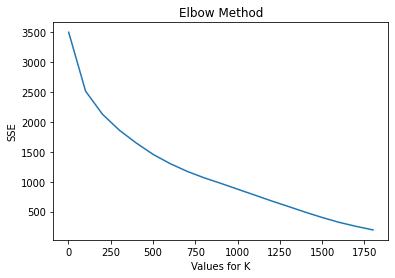

In [ ]:
sse = {}
for k in np.arange(1,1900,100):
    kmeans = KMeans(n_clusters=k, max_iter=4000).fit(X_ntf_2)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=300)
kmeans.fit(X_ntf_2)
result_1 = pd.concat([n_description,pd.DataFrame(X_ntf_2.toarray(),columns=vectorizer_ntf.get_feature_names())],axis=1)
result_1['cluster'] = kmeans.predict(X_ntf_2)
result_1.rename(columns = {0:'Description'}, inplace = True)
print(kmeans.inertia_)

1855.8249669233523


Sau khi loại bỏ các từ không hợp lí thì SSE (Sum of Square Error) giảm từ 2537 -> 2158

In [ ]:
# dán nhãn cho các cụm
clusters_1 = result_1['cluster'].unique()
labels = []
for i in range(len(clusters_1)):
    subset = result_1[result_1['cluster'] == clusters_1[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Description' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters_1,labels),columns=['cluster','label'])
result_1_labelled = pd.merge(result_1,labels_table,on='cluster',how='left')
result_1_labelled[['Description','cluster','label_y']]


,Description,cluster,label_y
0,inflatable political globe,2,
1,groovy cactus inflatable,2,
2,doggy rubber,2,
3,hearts wrapping tape,196,tape
4,spots red bookcover tape,2,
...,...,...,...
3613,discount,2,
3614,dotcom postage,2,
3615,manual,2,
3616,pads match cushions,2,


In [ ]:
clusters = result_1['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result_1[result_1['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Description' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_1_labelled = pd.merge(result_1,labels_table,on='cluster',how='left')
labels_table.head(200)

,cluster,label
0,2,
1,196,tape
2,3,pencil tube
3,49,pen
4,218,fan
...,...,...
195,219,hand
196,217,bank
197,193,kit
198,242,babi


In [ ]:
result_1_labelled[result_1_labelled['label_y']=="bag"].Description.head(50)

161              red retrospot shopper bag
162                 woodland charlotte bag
164            red retrospot charlotte bag
165                lunch bag red retrospot
166                     lunch bag woodland
167                  lunch bag black skull
271     grey floral feltcraft shoulder bag
272      red floral feltcraft shoulder bag
273     pink floral feltcraft shoulder bag
313             red retrospot shopping bag
348             charlie lola charlotte bag
880         jumbo bag scandinavian paisley
881         jumbo bag pink vintage paisley
884        scandinavian paisley picnic bag
885        pink vintage paisley picnic bag
886                     skull shoulder bag
887                      suki shoulder bag
888               red retrospot picnic bag
1147         wash bag vintage rose paisley
1148     cosmetic bag vintage rose paisley
1149    overnight bag vintage rose paisley
1192                pink polkadot kids bag
1193                blue polkadot kids bag
1223       

In [ ]:
pd.pivot_table(result_1_labelled,index = 'label_y',values = ['Description'],aggfunc = 'count').sort_values(['Description'],ascending = False)

,Description
label_y,
,1457
heart,48
bag,43
cushion,42
candl,37
...,...
photofram,2
chocolatecandl,1
bracelet montan,1


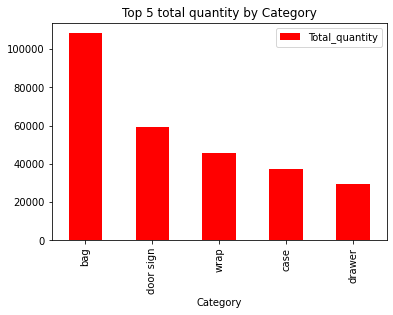

In [ ]:
cluster_df = pd.merge(df,result_1_labelled[['Description','label_y']],on="Description",how='left')
cluster_df = cluster_df[cluster_df['label_y']!=""].groupby('label_y').aggregate( Total_quantity = ('Quantity','sum'))
cluster_df.reset_index(inplace = True)
cluster_df.sort_values(by='Total_quantity',ascending = False,inplace = True)
cluster_df.iloc[:5].plot(kind = 'bar',x = 'label_y',color = 'red')
plt.xlabel('Category',fontsize = 10)
plt.title('Top 5 total quantity by Category')
plt.show()

In [ ]:
label_series = pd.Series(result_1_labelled['label_y'])
for lab in label_series.unique():
  print('label:',lab)

label: 
label: tape
label: pencil tube
label: pen
label: fan
label: paper parasol
label: parasol
label: umbrella
label: scissor
label: sticker
label: flower
label: wrap
label: flock
label: bag gift
label: album photo
label: purs
label: handbag
label: eras
label: cone
label: tin
label: holder
label: porcelain
label: cover passport
label: luggag tag
label: ball
label: print
label: bowl
label: doormat
label: monster
label: cushion
label: mobil
label: decor heart
label: strawberri
label: bag
label: case
label: glove
label: book
label: sketchbook
label: journal
label: notebook
label: chrysanthemum
label: headphon muff
label: stool
label: tray
label: hook
label: dish
label: mirror
label: clip
label: frame
label: frame heart photo
label: heart holder
label: charger heart
label: candl holder
label: candl pot
label: cactu candl
label: filler pad
label: box
label: pencil
label: heart jazz
label: washbag
label: candlestick
label: hous
label: rabbit
label: cadet space
label: towel
label: napkin
la

In [ ]:
category = []
bag = ['bag','backpack']
stationary = ['pen','pencil','notebook','journal']
candle = ['candl','holder','candlehold','light']
jar = ['jar']
household = ['bake','calendar','rack','curtain','feather','wall','drawer','tin','board','paper tabl','acapulco mat','carriag','thermomet']
decorations = ['sign','letter','star','flower','heart','signcupcak','england','wrap','peaker spot','charm','point']
jewelry = ['bracelet','necklac','ear','bead','chain light','jewel','jewelleri']
clothes = ['hairband','bow brooch','hair tie','towel','ring','hand']
hair_care = ['comb','hair pack','purs silk']
toys = ['helicopter','card','number','doll','board memo','teddi','spaceboy']
photo = ['photofram','imag']
make_up = ['cover cushion','cushion']
tag = ['tag']
dishes = ['kitchen','placemat','tray','cup','plates','cutter','bowl','cutleri']
clock = ['clock']
technology = ['radio']
others = ['gauz','base','whitepink']
for lab in label_series.unique():
  if lab.index('candl'):
    print('duyệt')
  else:
    print('ngu')

ValueError: ignored

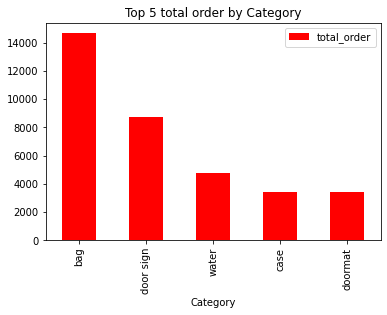

In [ ]:
cluster_df = pd.merge(df,result_1_labelled[['Description','label_y']],on="Description",how='left')
cluster_df = cluster_df[cluster_df['label_y']!=""].groupby('label_y').aggregate( total_order = ('InvoiceNo','count'))
cluster_df.reset_index(inplace = True)
cluster_df.sort_values(by='total_order',ascending = False,inplace = True)
cluster_df.iloc[:5].plot(kind = 'bar',x = 'label_y',color = 'red')
plt.xlabel('Category',fontsize = 10)
plt.title('Top 5 total order by Category')
plt.show()

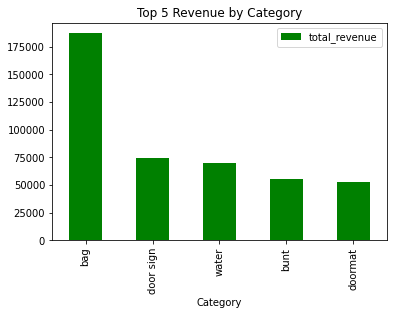

In [ ]:
cluster_df = pd.merge(df,result_1_labelled[['Description','label_y']],on="Description",how='left')
cluster_df = cluster_df[cluster_df['label_y']!=""].groupby('label_y').aggregate( total_revenue = ('Totalsale','sum'))
cluster_df.reset_index(inplace = True)
cluster_df.sort_values(by='total_revenue',ascending = False,inplace = True)
cluster_df.iloc[:5].plot(kind = 'bar',x = 'label_y',color = 'green')
plt.xlabel('Category',fontsize = 10)
plt.title('Top 5 Revenue by Category')
plt.show()

# Chi-square test

## Kiểm định tính độc lập giữa biến Season và Category

In [ ]:
dfcate = pd.merge(df,result_1_labelled[['Description','label_y']],on="Description",how='left')
dfcate.head(3)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Month,Year,Season,label_y
0,536365,01-12-2010,85123A,white hanging heart tlight holder,6,2.55,15.30,17850.0,United Kingdom,1,2010,Spring,heart holder
1,536365,01-12-2010,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,1,2010,Spring,
2,536365,01-12-2010,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,1,2010,Spring,


In [ ]:
dfchisq = pd.crosstab(dfcate['label_y'], dfcate['Season'])
dfchisq

Season,Fall,Spring,Summer,Winter
label_y,,,,
,33907,27032,31986,39553
acapulco mat,165,174,401,137
acryl bangl,4,2,1,3
advent calendar,72,34,30,151
alarm bakelik clock,706,470,529,724
...,...,...,...,...
washbag,46,35,51,53
water,121,65,77,208
whitepink,6,30,9,13


In [ ]:
array_chisq = dfchisq.to_numpy()

**Các giả thuyết kiểm định  :**                          
  H0: Season và Category là ĐỘC LẬP            
  Ha: Season và Category là PHỤ THUỘC lẫn nhau 


In [ ]:
alpha = .05
confidence_level = (1 - alpha)

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(array_chisq)

In [ ]:
print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')

if (p < alpha):
    print('Vì (p < alpha) cho nên BÁC BỎ H0 ==> Season và Category PHỤ THUỘC lẫn nhau')
else:
    print('Vì (p >= alpha) cho nên KHÔNG bác bỏ H0 ==> Season và Category ĐỘC LẬP')    

p-value = 0.00, alpha = 0.05
Vì (p < alpha) cho nên BÁC BỎ H0 ==> Season và Category PHỤ THUỘC lẫn nhau


## Kiểm định tính độc lập giữa biến Season và Country

In [ ]:
dfchisq = pd.crosstab(df['Country'], df['Season'])
dfchisq

Season,Fall,Spring,Summer,Winter
Country,,,,
Australia,297,95,86,59
Austria,128,25,69,13
Bahrain,11,0,4,0
Belgium,406,329,390,241
Brazil,0,0,23,0
Canada,5,10,51,70
Channel Islands,272,70,178,59
Cyprus,116,84,1,129
Czech Republic,6,8,0,0


In [ ]:
array_chisq = dfchisq.to_numpy()

**Các giả thuyết kiểm định  :**                          
  H0: Season và Country là ĐỘC LẬP            
  Ha: Season và Country là PHỤ THUỘC lẫn nhau 


In [ ]:
alpha = .05
confidence_level = (1 - alpha)

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(array_chisq)

In [ ]:
print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')

if (p < alpha):
    print('Vì (p < alpha) cho nên BÁC BỎ H0 ==> Season và Country PHỤ THUỘC lẫn nhau')
else:
    print('Vì (p >= alpha) cho nên KHÔNG bác bỏ H0 ==> Season và Country ĐỘC LẬP')    

p-value = 0.00, alpha = 0.05
Vì (p < alpha) cho nên BÁC BỎ H0 ==> Season và Country PHỤ THUỘC lẫn nhau


# Kiểm định Levene 

In [ ]:
import pandas            as pd
import scipy.stats       as stats
import statsmodels.api   as sm

from statsmodels.formula.api     import ols

In [ ]:
df = pd.read_csv('/content/Totalsale_byseason.csv')
df=df.dropna(inplace = False)
df

,Spring,Summer,Fall,Winter
0,15.30,31.60,-9.35,15.00
1,20.34,29.70,21.96,39.60
2,22.00,13.95,13.52,30.60
3,20.34,22.50,25.20,35.40
4,20.34,22.50,15.00,13.20
...,...,...,...,...
35388,23.40,4.16,19.80,2.08
35389,29.70,8.40,26.40,2.08
35390,19.80,11.60,10.50,5.10
35391,15.30,11.70,27.00,8.25


In [ ]:
alpha = .05

In [ ]:
## Các giả thuyết kiểm định LEVENE:                             
##     H0: VAR(Spring) = VAR(Summer) = VAR(Fall) = VAR(Winter)
##     Ha: Các phương sai KHÔNG BẰNG NHAU         

In [ ]:
levene, p = stats.levene(df.Spring, df.Summer, df.Fall, df.Winter)
print(f'Trị thống kê Levene = {levene:4f}, trị số p = {p:4f}')

if (p < alpha):
    print('Vì (p < alpha) cho nên BÁC BỎ H0 ==> Phương sai KHÁC NHAU')
else:
    print('Vì (p >= alpha) cho nên KHÔNG bác bỏ H0 ==> Phương sai GIỐNG NHAU')

Trị thống kê Levene = 7.879858, trị số p = 0.000030
Vì (p < alpha) cho nên BÁC BỎ H0 ==> Phương sai KHÁC NHAU


# Kiểm định Shapiro

In [ ]:
## Các giả thuyết kiểm định SHAPIRO:                              
##     H0: Spring, Summer, Fall, Winter ~ Norm(Mu, Sigma) 
##     Ha: KHÔNG phải pp chuẩn     

In [ ]:
df_melt = pd.melt(df.reset_index(), id_vars = ['index'], 
                  value_vars = ['Spring', 'Summer', 'Fall', 'Winter'])
print(df, '\n')
print(df_melt)

       Spring  Summer   Fall  Winter
0       15.30   31.60  -9.35   15.00
1       20.34   29.70  21.96   39.60
2       22.00   13.95  13.52   30.60
3       20.34   22.50  25.20   35.40
4       20.34   22.50  15.00   13.20
...       ...     ...    ...     ...
35388   23.40    4.16  19.80    2.08
35389   29.70    8.40  26.40    2.08
35390   19.80   11.60  10.50    5.10
35391   15.30   11.70  27.00    8.25
35392   25.20   25.00  13.50    9.90

[35393 rows x 4 columns] 

        index variable  value
0           0   Spring  15.30
1           1   Spring  20.34
2           2   Spring  22.00
3           3   Spring  20.34
4           4   Spring  20.34
...       ...      ...    ...
141567  35388   Winter   2.08
141568  35389   Winter   2.08
141569  35390   Winter   5.10
141570  35391   Winter   8.25
141571  35392   Winter   9.90

[141572 rows x 3 columns]


In [ ]:
## Kiểm định Shapiro dựa trên Ordinary Least Squares (OLS) model
df_melt.columns = ['index', 'season', 'value']  # tên các cột
model = ols('value ~ C(season)', data = df_melt).fit()
shapiro, p = stats.shapiro(model.resid)
print(f'Trị thống kê Shapiro = {shapiro:4f}, trị số p = {p:4f}')

if (p < alpha):
    print('Vì (p < alpha) cho nên BÁC BỎ H0 ==> KHÔNG phải pp chuẩn')
else:
    print('Vì (p >= alpha) cho nên KHÔNG bác bỏ H0 ==> ~ Norm(Mu, Sigma)')

Trị thống kê Shapiro = 0.951068, trị số p = 0.000000
Vì (p < alpha) cho nên BÁC BỎ H0 ==> KHÔNG phải pp chuẩn


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Từ kết quả của kiểm định Levene và Shapiro, ta nhận thấy phân phối của Totalsale theo từng Season không cùng phương sai và không có phân phối chuẩn.
Vì vậy ta không thể thực hiện kiểm định ANOVA về sự độc lập giữa Totalsale và Season

# SVD GIẢM CHIỀU DỮ LIỆU

In [ ]:
df = pd.read_csv('/content/clustered.csv', index_col = 0)
df.head(10)

,Avg. Quantity,Avg. Price,Frequency,# of Products,Country,CustomerID,Cluster
0,5.549669,3.085132,35.0,24.0,UK,17850.0,2
1,6.734375,4.056823,18.0,103.0,UK,13047.0,0
2,13.390110,2.745220,17.0,97.0,non-UK,12583.0,1
3,7.762058,2.092219,26.0,146.0,UK,14688.0,2
4,7.789474,1.770000,5.0,19.0,UK,17809.0,1
5,3.148569,2.513386,112.0,543.0,UK,15311.0,2
6,6.288462,3.686538,7.0,26.0,UK,16098.0,0
7,6.000000,5.172222,1.0,9.0,UK,18074.0,0
8,8.833333,3.881333,3.0,28.0,UK,17420.0,0
9,8.666667,3.088333,2.0,22.0,UK,16250.0,1


In [ ]:
X = df.iloc[:,0:4]
X

,Avg. Quantity,Avg. Price,Frequency,# of Products
0,5.549669,3.085132,35.0,24.0
1,6.734375,4.056823,18.0,103.0
2,13.390110,2.745220,17.0,97.0
3,7.762058,2.092219,26.0,146.0
4,7.789474,1.770000,5.0,19.0
...,...,...,...,...
4211,8.000000,4.550000,1.0,2.0
4212,6.333333,5.830000,1.0,12.0
4213,11.411765,1.814706,1.0,17.0
4214,1.500000,4.110000,1.0,8.0


In [ ]:
tsvd = TruncatedSVD(n_components=3)
X_tsvd = tsvd.fit(X).transform(X)

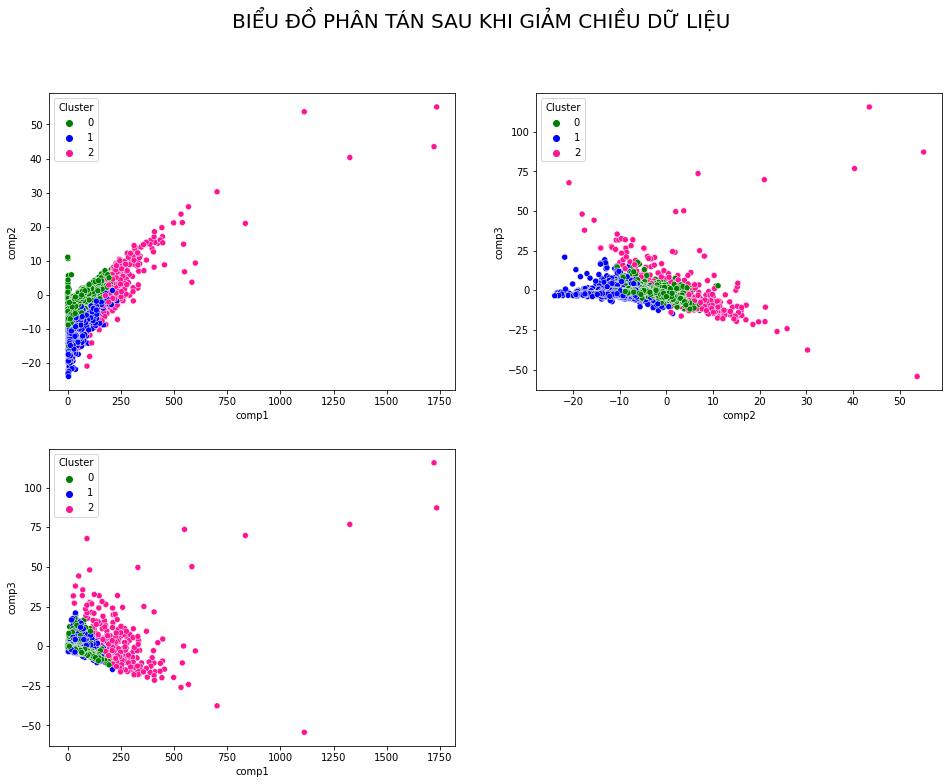

In [ ]:
df1 = pd.DataFrame(X_tsvd, columns = ["comp1", "comp2", "comp3"])
df1["Cluster"] = df['Cluster']

plt.figure(figsize = (16, 12))
plt.suptitle('BIỂU ĐỒ PHÂN TÁN SAU KHI GIẢM CHIỀU DỮ LIỆU', size = "20")

plt.subplot(2, 2, 1)
sbn.scatterplot(x = "comp1", y = "comp2", data = df1, hue = "Cluster", palette = ['green','blue','deeppink'])

plt.subplot(2, 2, 2)
sbn.scatterplot(x = "comp2", y = "comp3", data = df1, hue = "Cluster", palette = ['green','blue','deeppink'])

plt.subplot(2, 2, 3)
sbn.scatterplot(x = "comp1", y = "comp3", data = df1, hue = "Cluster", palette = ['green','blue','deeppink'])